<a href="https://colab.research.google.com/github/Rajeshsharma33/EDGE-Project/blob/main/edge%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample data written to student_data.csv

Menu:
1. Analyze Data
2. Filter Failing Students
3. Visualize Data
4. Add New Student Data
5. Save and Exit
Enter your choice: 1
Average Scores:
Student Name
Minhajul    79.0
Rajesh      75.0
Rifat       80.0
Tanmoy      85.0
Name: Score, dtype: float64

Minimum and Maximum Scores:
              min  max
Student Name          
Minhajul       79   79
Rajesh         75   75
Rifat          80   80
Tanmoy         85   85

Students with attendance < 75% or missing assignments:
  Student Name Student ID Subject  Score  Attendance Percentage  \
1       Tanmoy   STU-1002     CSE     85                     70   
3        Rifat   STU-1004    Math     80                     60   

  Assignment Completion  
1                    No  
3                    No  

Menu:
1. Analyze Data
2. Filter Failing Students
3. Visualize Data
4. Add New Student Data
5. Save and Exit
Enter your choice: 2
Enter subject to filter failing students: 3
Failing students in 3:
Empty

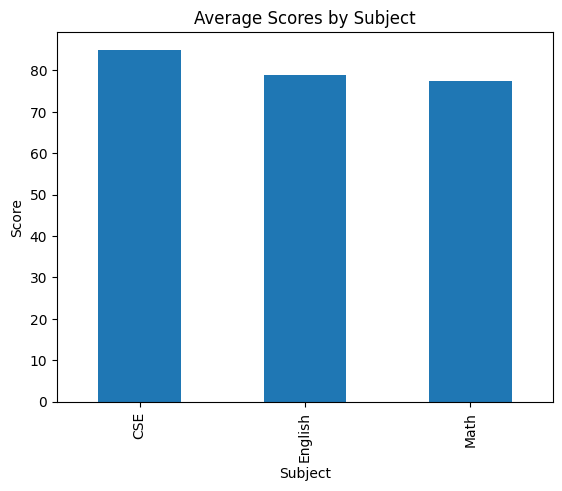

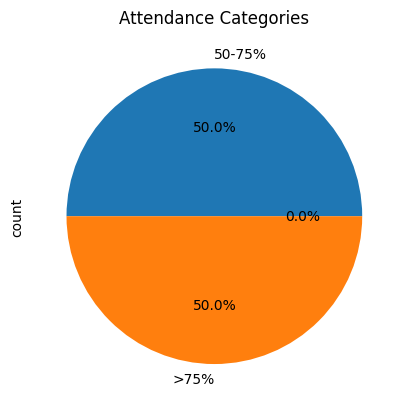


Menu:
1. Analyze Data
2. Filter Failing Students
3. Visualize Data
4. Add New Student Data
5. Save and Exit
Enter your choice: 4
Enter Student Name: 5
Enter Student ID: 2222
Invalid ID format. Use STU-XXXX.

Menu:
1. Analyze Data
2. Filter Failing Students
3. Visualize Data
4. Add New Student Data
5. Save and Exit


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Data Collection and Storage
def create_sample_csv(file_path):
    data = {
        "Student Name": ["Rajesh", "Tanmoy", "Minhajul", "Rifat"],
        "Student ID": ["STU-1001", "STU-1002", "STU-1003", "STU-1004"],
        "Subject": ["Math", "CSE", "English", "Math"],
        "Score": [75, 85, 79, 80],
        "Attendance Percentage": [88, 70, 92, 60],
        "Assignment Completion": ["Yes", "No", "Yes", "No"],
    }
    df = pd.DataFrame(data)
    df.to_csv(file_path, index=False)
    print(f"Sample data written to {file_path}")

# Basic File Handling
def read_csv(file_path):
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None

def write_csv(df, file_path):
    df.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}")

# Data Analysis and Manipulation
def analyze_data(df):
    print("Average Scores:")
    print(df.groupby("Student Name")["Score"].mean())
    print("\nMinimum and Maximum Scores:")
    print(df.groupby("Student Name")["Score"].agg(["min", "max"]))

    print("\nStudents with attendance < 75% or missing assignments:")
    low_attendance_or_missing = df[(df["Attendance Percentage"] < 75) | (df["Assignment Completion"] == "No")]
    print(low_attendance_or_missing)

def filter_failing_students(df, subject):
    failing_students = df[(df["Subject"] == subject) & (df["Score"] < 50)]
    print(f"Failing students in {subject}:")
    print(failing_students)

def convert_score_to_int(df):
    df["Score"] = df["Score"].astype(int)

# Visualization
def plot_visualizations(df):
    # Bar chart of average scores by subject
    avg_scores = df.groupby("Subject")["Score"].mean()
    avg_scores.plot(kind="bar", title="Average Scores by Subject", ylabel="Score", xlabel="Subject")
    plt.show()

    # Pie chart of attendance percentage categories
    attendance_categories = pd.cut(df["Attendance Percentage"], bins=[0, 50, 75, 100], labels=["<50%", "50-75%", ">75%"])
    attendance_categories.value_counts().plot(kind="pie", title="Attendance Categories", autopct="%1.1f%%")
    plt.show()

# Functions for Logic
def calculate_aggregate_scores(df):
    df["Aggregate Score"] = df.groupby("Student Name")["Score"].transform("sum")

def determine_grade(score):
    if score >= 90:
        return "A"
    elif score >= 75:
        return "B"
    elif score >= 50:
        return "C"
    else:
        return "Fail"

def apply_grades(df):
    df["Grade"] = df["Score"].apply(determine_grade)

# Interactive Console I/O
def add_student_data(df):
    name = input("Enter Student Name: ")
    student_id = input("Enter Student ID: ")
    if not re.match(r"STU-\d{4}", student_id):
        print("Invalid ID format. Use STU-XXXX.")
        return df

    subject = input("Enter Subject: ")
    score = int(input("Enter Score: "))
    attendance = int(input("Enter Attendance Percentage: "))
    assignment = input("Assignment Completed (Yes/No): ")

    new_data = {
        "Student Name": name,
        "Student ID": student_id,
        "Subject": subject,
        "Score": score,
        "Attendance Percentage": attendance,
        "Assignment Completion": assignment,
    }
    return df._append(new_data, ignore_index=True)

def main():
    file_path = "student_data.csv"
    if not os.path.exists(file_path):
        create_sample_csv(file_path)

    df = read_csv(file_path)
    if df is None:
        return

    while True:
        print("\nMenu:")
        print("1. Analyze Data")
        print("2. Filter Failing Students")
        print("3. Visualize Data")
        print("4. Add New Student Data")
        print("5. Save and Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            analyze_data(df)
        elif choice == "2":
            subject = input("Enter subject to filter failing students: ")
            filter_failing_students(df, subject)
        elif choice == "3":
            plot_visualizations(df)
        elif choice == "4":
            df = add_student_data(df)
        elif choice == "5":
            write_csv(df, file_path)
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
